In [3]:
import psutil
import time
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import Workbook, load_workbook
from datetime import datetime,date
from IPython.display import clear_output
import ipywidgets as widgets
%matplotlib notebook


In [ ]:
wb=load_workbook("C:/Users/karth/Downloads/system_monitor.xlsx")
ws_cpu=wb['cpu']
ws_ram=wb['ram']
ws_disk=wb['disk']
ws_bw=wb['bandwidth']

In [ ]:
import cpuinfo
a=cpuinfo.get_cpu_info()
print(a['brand_raw'])
print(a['arch'])
print(a['bits'])
print(a['count'])

In [ ]:
# CPU

fig=plt.figure()
l=[10,20,30,40,50,60,70,80,90,100]

ax=fig.add_subplot(111)
ax.grid()
ax.set_ylim(0,100)
ax.set_yticks(l)
plt.title('Cpu Utilization graph')
plt.xlabel('Time since start (sec)')
plt.ylabel('Usage')

x=[]
y=[]
i=0
    
while True:
    y.append(psutil.cpu_percent())
    x.append(i)
    
    ax.plot(x,y,color='b')
    fig.canvas.draw()
    ax.set_xlim(left=max(0,i-50),right=(i+10))
    ax.fill_between(x,y,facecolor='skyblue', alpha=0.30)
    ax.legend(['Usage %'])
    
    
    if i%10==0:
        
        d=date.today().strftime("%d/%m/%Y")
        t=datetime.now().strftime("%H:%M:%S")
        ws_cpu.append([d,t,y[-1],100-y[-1]])
        wb.save('C:/Users/karth/Downloads/system_monitor.xlsx')
    time.sleep(1)
    i+=1

In [ ]:
#Ram

fig1=plt.figure()

l=[10,20,30,40,50,60,70,80,90,100]

ax1=fig1.add_subplot(111)
ax1.grid()
ax1.set_ylim(0,100)
ax1.set_yticks(l)
plt.title('Ram Utilization graph')
plt.xlabel('Time since start (sec)')
plt.ylabel('Usage')

x1=[]
y1=[]
i=0


while True:
    y1.append(psutil.virtual_memory().percent)
    x1.append(i)
    
    ax1.plot(x1,y1,color='r')
    fig1.canvas.draw()
    ax1.set_xlim(left=max(0,i-50),right=(i+10))
    ax1.fill_between(x1,y1,facecolor='mistyrose', alpha=0.30)
    ax1.legend(['Usage %'])
    
    if i%10==0:
        
        d=date.today().strftime("%d/%m/%Y")
        t=datetime.now().strftime("%H:%M:%S")
        ws_ram.append([d,t,y1[-1],100-y1[-1]])
        wb.save('C:/Users/karth/Downloads/system_monitor.xlsx')
    time.sleep(1)    
    i+=1

<IPython.core.display.Javascript object>


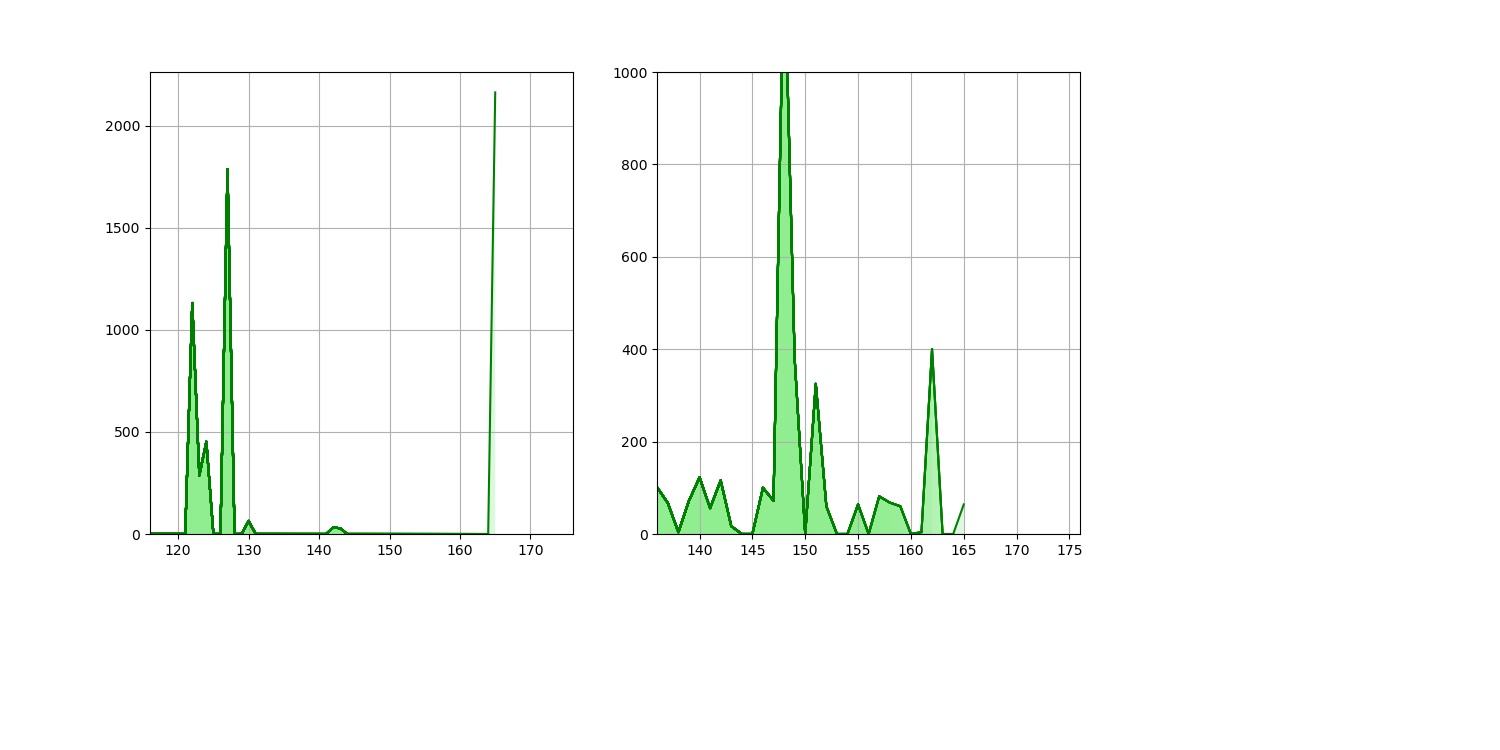

KeyboardInterrupt: 

In [166]:
fig2=plt.figure(figsize=(12, 6))

ax_r=fig2.add_subplot(121)
ax_w=fig2.add_subplot(122)

ax_r.grid()
ax_w.grid()

x2=[]
y2=[]
y21=[]
i=0

while True:
    x=psutil.disk_io_counters()
    old_read = x[2]/1024
    old_write=x[3]/1024
    time.sleep(1)
    
    x=psutil.disk_io_counters()
    new_read = x[2]/1024
    new_write=x[3]/1024
    
    read=new_read-old_read
    write=new_write-old_write
    
    y2.append(read)
    x2.append(i)
    
    y21.append(write)
    i+=1
    
    fig2.canvas.draw()
    ax_r.set_ylim(0,y2[-1]+100)
    ax_r.set_xlim(left=max(0,i-50),right=(i+10))
    ax_r.plot(x2,y2,color='g')
    ax_r.fill_between(x2,y2,facecolor='lightgreen', alpha=0.30)
    
    if write<1000:
        ax_w.set_ylim(0,1000)
    elif write>1000:
        ax_w.set_ylim(0,100000)
    ax_w.set_xlim(left=max(0,i-30),right=(i+10))
    ax_w.plot(x2,y21,color='g')
    ax_w.fill_between(x2,y21,facecolor='lightgreen', alpha=0.30)
    
    

<IPython.core.display.Javascript object>


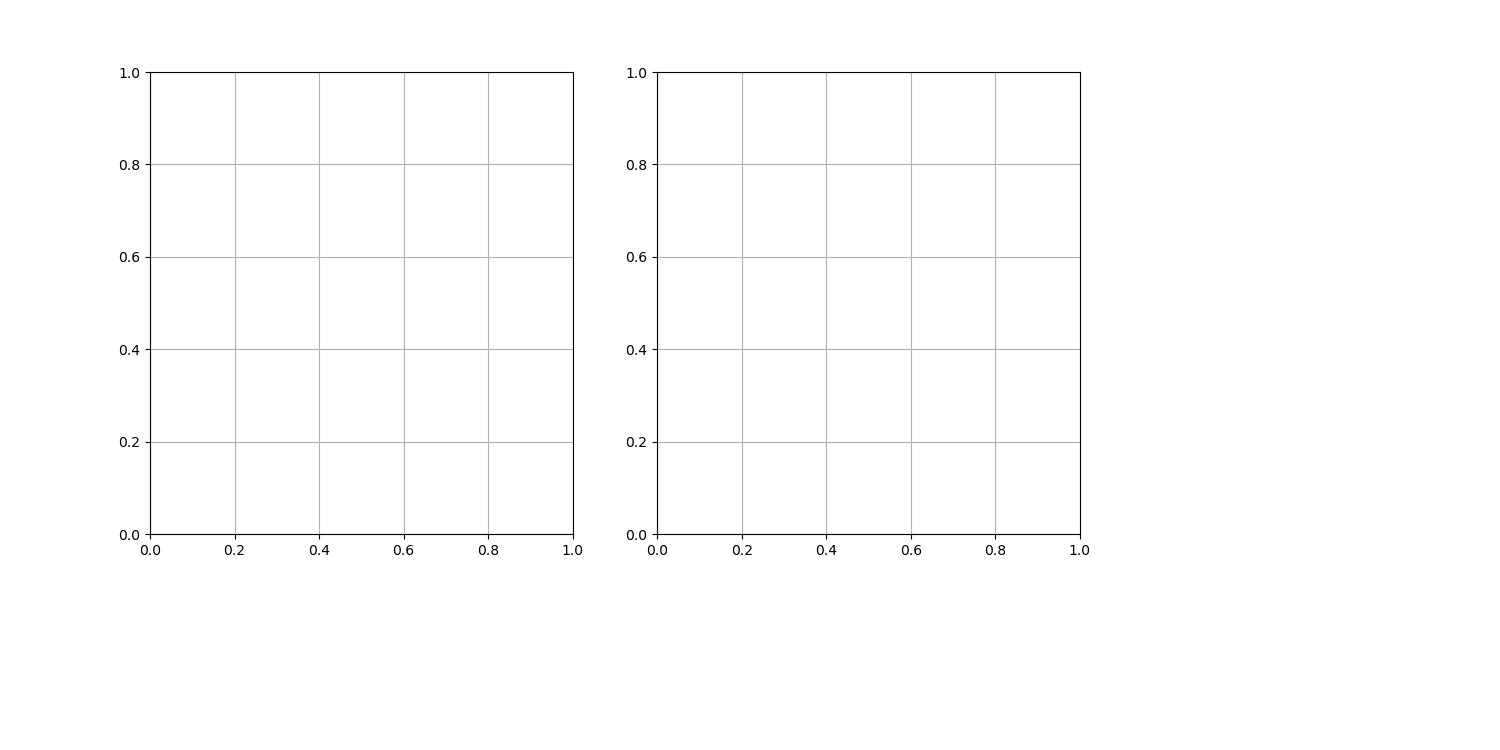

NameError: name 'y2' is not defined

In [5]:
#network

fig3=plt.figure(figsize=(12, 6))

ax_s=fig3.add_subplot(121)
ax_re=fig3.add_subplot(122)

ax_s.grid()
ax_re.grid()

x3=[]
y3=[]
y31=[]
i=0

while True:
    x=psutil.net_io_counters()
    old_sent = x[0]/1000
    old_receive=x[1]/1000
    time.sleep(1)
    
    x=psutil.net_io_counters()
    new_sent = x[0]/1000
    new_receive=x[1]/1000
    
    sent=new_sent-old_sent
    receive=new_receive-old_receive
    
    y3.append(sent)
    x3.append(i)
    
    y31.append(receive)
    i+=1
    
    fig3.canvas.draw()
    ax_s.set_ylim(0,y2[-1]+100)
    ax_s.set_xlim(left=max(0,i-50),right=(i+10))
    ax_s.plot(x3,y3,color='g')
    ax_s.fill_between(x3,y3,facecolor='lightgreen', alpha=0.30)
    
    if write<1000:
        ax_re.set_ylim(0,1000)
    elif write>1000:
        ax_re.set_ylim(0,100000)
    ax_re.set_xlim(left=max(0,i-30),right=(i+10))
    ax_re.plot(x3,y31,color='g')
    ax_re.fill_between(x3,y31,facecolor='lightgreen', alpha=0.30)
    
    

In [26]:
import os
os.system("start EXCEL.EXE C:/Users/karth/Downloads/system_monitor.xlsx")

0

In [66]:
d=date.today().strftime("%d/%m/%Y")
t=datetime.now().strftime("%H:%M:%S")
print(d,t)

09/11/2021 18:09:37


In [176]:
ws_cpu.delete_rows(2, ws_ram.max_row-1)
wb.save('C:/Users/karth/Downloads/system_monitor.xlsx')


In [174]:
x=psutil.net_io_counters()

print(x)

snetio(bytes_sent=115089041, bytes_recv=692628531, packets_sent=415045, packets_recv=778196, errin=0, errout=0, dropin=0, dropout=0)


In [6]:
import platform
print(platform.platform())
print(uname.system)
print(uname.node)
print(uname.release)
print(uname.version)
print(platform.machine())
print(uname.processor)

Windows-10-10.0.22483-SP0


NameError: name 'uname' is not defined

In [6]:
print(platform.uname())

uname_result(system='Windows', node='LAPTOP-INU3PF77', release='10', version='10.0.22000', machine='AMD64', processor='Intel64 Family 6 Model 126 Stepping 5, GenuineIntel')


In [7]:
print(platform.architecture())

('64bit', 'WindowsPE')


In [8]:
print(platform.node())

LAPTOP-INU3PF77


In [9]:
print(platform.system())

Windows


In [16]:
import cpuinfo
print(cpuinfo.get_cpu_info()['brand_raw'])

Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz


In [18]:
for item in range(0,10):
    print(item, sep=' ', end='', flush=True)

0123456789

In [25]:
from IPython.display import clear_output

i=0
while True:
    clear_output(wait=True)
    print(i)
    i+=1
    time.sleep(1)

40


KeyboardInterrupt: 

In [118]:
import ipywidgets as widgets
out = widgets.Output()
out

Output()

In [120]:
with out:
    for i in range(10):
        out.clear_output()
        print(i, 'Hello world!')

In [104]:
 with out:
        out.clear_output()
        out.append_stdout(y[-1])

In [ ]:
out.append_display_data(fig)


<IPython.core.display.Javascript object>


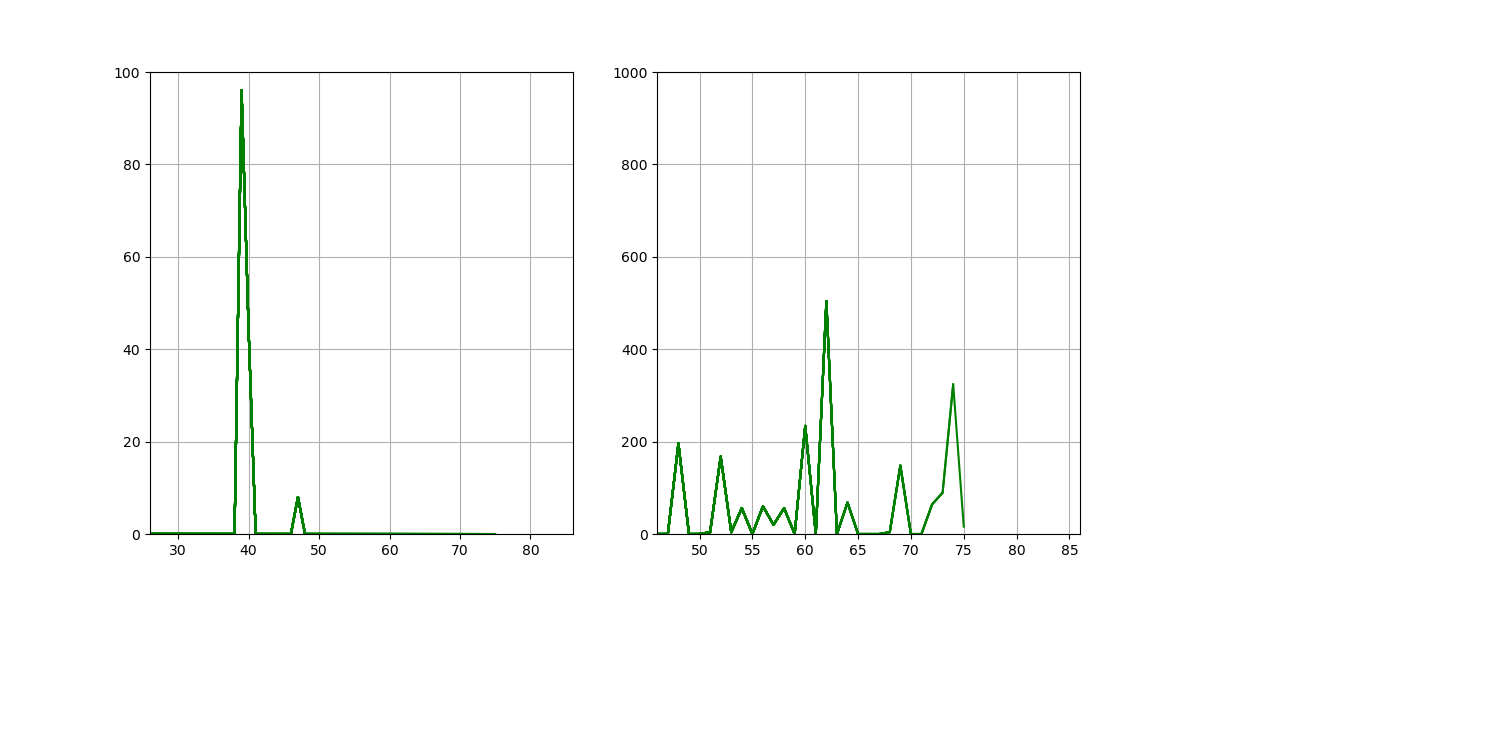

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


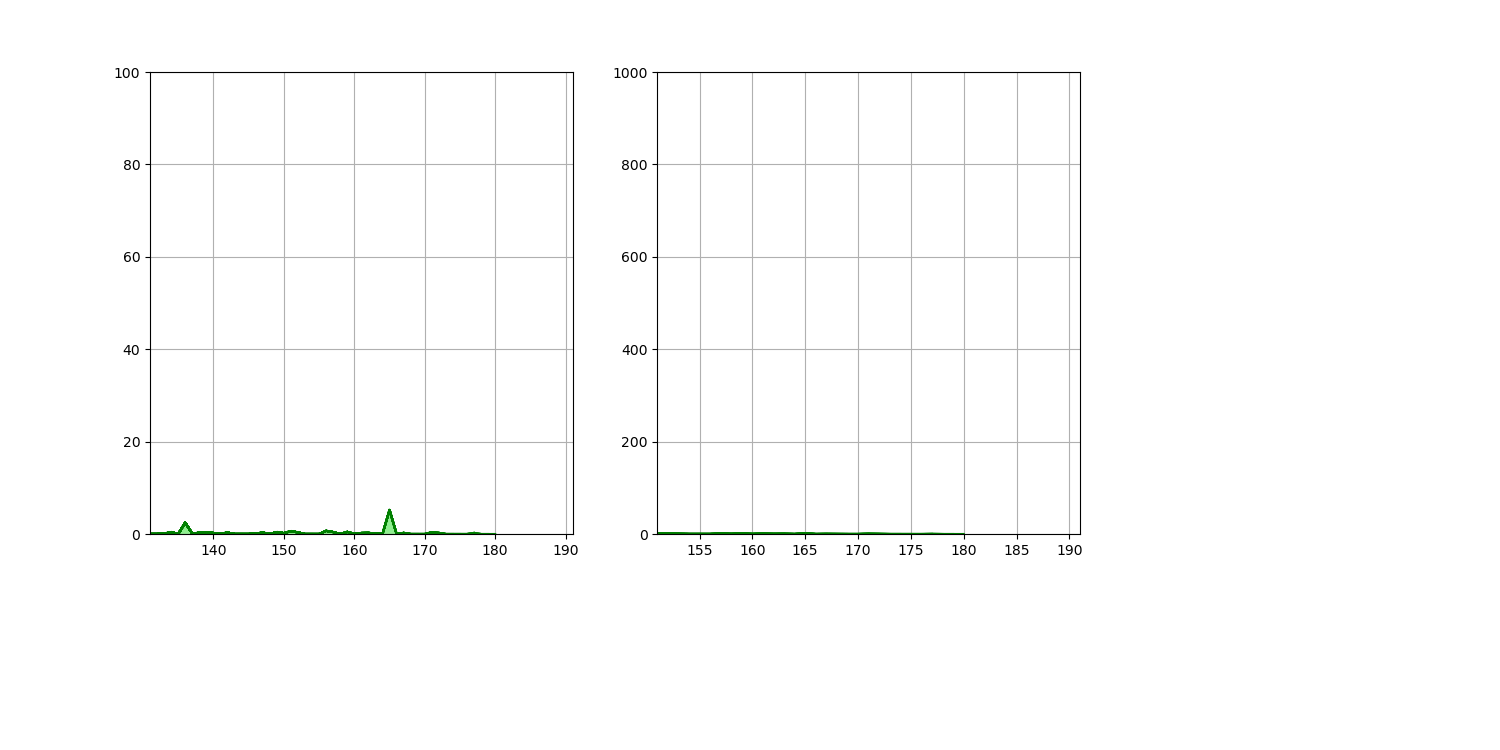

KeyboardInterrupt: 